In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.express as px
import seaborn as sns

In [2]:

f=open('imports-85.names').read()
x=f.split('\n')
y=x[60:86]
z=[z.strip() for z in y]
koloni=[]
for row in z:
    temp=row.split(' ')
    koloni.append(temp[1].strip(':'))
    

In [3]:
data = pd.read_csv('imports-85.data')
data.columns=koloni
data

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            1                 ?  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2                 ?         audi       gas        std   
..         ...               ...          ...       ...        ...   
199         -1                95        volvo       gas        std   
200         -1                95        volvo       gas      turbo   
201         -1                95        volvo       gas        std   
202         -1                95        volvo    diesel      turbo   
203         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two    hatchback          rwd           front        94.5  ...   
2           four        sedan          fwd           front        99.8  ...   
3           four        sedan          4wd           front        99.4  ...   
4            two        sedan          fwd           front        99.8  ...   
..           ...          ...          ...             ...         ...  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            152         mpfi  2.68    3.47               9.0        154   
2            109         mpfi  3.19    3.40              10.0        102   
3            136         mpfi  3.19    3.40               8.0        115   
4            136         mpfi  3.19    3.40               8.5        110   
..           ...          ...   ...     ...               ...        ...   
199          141         mpfi  3.78    3.15               9.5        114   
200          141         mpfi  3.78    3.15               8.7        160   
201          173         mpfi  3.58    2.87               8.8        134   
202          145          idi  3.01    3.40              23.0        106   
203          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  16500  
1        5000       19          26  16500  
2        5500       24          30  13950  
3        5500       18          22  17450  
4        5500       19          25  15250  
..        ...      ...         ...    ...  
199      5400       23          28  16845  
200      5300       19          25  19045  
201      5500       18          23  21485  
202      4800       26          27  22470  
203      5400       19          25  22625  

[204 rows x 26 columns]

In [4]:
data.replace("?", np.nan, inplace = True)


In [5]:
for atribute in ['normalized-losses','bore','stroke','horsepower','peak-rpm']:
    replace = data[atribute].astype("float").mean(axis=0)
    data[atribute].replace(np.nan,replace,inplace=True)

replace=data['num-of-doors'].value_counts().idxmax()
data['num-of-doors'].replace(np.nan,replace,inplace=True)    
data.dropna(subset=["price"],axis=0,inplace=True)

data.reset_index(drop=True,inplace=True)
data.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             122.0  alfa-romero       gas        std          two   
1          1             122.0  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2             122.0         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1    hatchback          rwd           front        94.5  ...          152   
2        sedan          fwd           front        99.8  ...          109   
3        sedan          4wd           front        99.4  ...          136   
4        sedan          fwd           front        99.8  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  2.68    3.47               9.0        154      5000       19   
2         mpfi  3.19    3.40              10.0        102      5500       24   
3         mpfi  3.19    3.40               8.0        115      5500       18   
4         mpfi  3.19    3.40               8.5        110      5500       19   

  highway-mpg  price  
0          27  16500  
1          26  16500  
2          30  13950  
3          22  17450  
4          25  15250  

[5 rows x 26 columns]

In [6]:
data[["bore", "stroke"]] = data[["bore", "stroke"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")
data[["price"]] = data[["price"]].astype("float")
data[["peak-rpm"]] = data[["peak-rpm"]].astype("float")
data.dtypes


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [7]:
data["length"] = data["length"]/data["length"].max()
data["width"] = data["width"]/data["width"].max()
data['height'] = data['height']/data['height'].max() 
data['horsepower'].head()

0    111
1    154
2    102
3    115
4    110
Name: horsepower, dtype: object

In [26]:
data.corr()


symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.469772   -0.529145 -0.364511   
normalized-losses   0.469772           1.000000   -0.057068  0.019433   
wheel-base         -0.529145          -0.057068    1.000000  0.879005   
length             -0.364511           0.019433    0.879005  1.000000   
width              -0.237262           0.086961    0.814593  0.857271   
height             -0.542261          -0.377664    0.583789  0.492955   
curb-weight        -0.234743           0.099404    0.787584  0.881058   
engine-size        -0.112069           0.112362    0.576779  0.685531   
bore               -0.145790          -0.029929    0.501576  0.610847   
stroke              0.008072           0.055673    0.144733  0.120929   
compression-ratio  -0.181073          -0.114738    0.249689  0.159203   
horsepower          0.074617           0.217322    0.375610  0.580583   
peak-rpm            0.284033           0.239580   -0.365045 -0.286688   
city-mpg           -0.030158          -0.225255   -0.480029 -0.667658   
highway-mpg         0.041248          -0.182011   -0.552211 -0.700186   
price              -0.083327           0.133999    0.589147  0.691044   

                      width    height  curb-weight  engine-size      bore  \
symboling         -0.237262 -0.542261    -0.234743    -0.112069 -0.145790   
normalized-losses  0.086961 -0.377664     0.099404     0.112362 -0.029929   
wheel-base         0.814593  0.583789     0.787584     0.576779  0.501576   
length             0.857271  0.492955     0.881058     0.685531  0.610847   
width              1.000000  0.300995     0.867720     0.731100  0.548485   
height             0.300995  1.000000     0.310660     0.076255  0.187917   
curb-weight        0.867720  0.310660     1.000000     0.849090  0.644552   
engine-size        0.731100  0.076255     0.849090     1.000000  0.572878   
bore               0.548485  0.187917     0.644552     0.572878  1.000000   
stroke             0.182864 -0.081103     0.168669     0.208133 -0.051087   
compression-ratio  0.189008  0.259526     0.156444     0.029005  0.002034   
horsepower         0.617115 -0.085829     0.758076     0.822689  0.566807   
peak-rpm          -0.247337 -0.315820    -0.279422    -0.256681 -0.267061   
city-mpg          -0.638155 -0.057087    -0.750390    -0.651002 -0.581272   
highway-mpg       -0.684700 -0.111568    -0.795515    -0.679877 -0.590672   
price              0.752795  0.137284     0.834420     0.872337  0.543433   

                     stroke  compression-ratio  horsepower  peak-rpm  \
symboling          0.008072          -0.181073    0.074617  0.284033   
normalized-losses  0.055673          -0.114738    0.217322  0.239580   
wheel-base         0.144733           0.249689    0.375610 -0.365045   
length             0.120929           0.159203    0.580583 -0.286688   
width              0.182864           0.189008    0.617115 -0.247337   
height            -0.081103           0.259526   -0.085829 -0.315820   
curb-weight        0.168669           0.156444    0.758076 -0.279422   
engine-size        0.208133           0.029005    0.822689 -0.256681   
bore              -0.051087           0.002034    0.566807 -0.267061   
stroke             1.000000           0.186780    0.100881 -0.066021   
compression-ratio  0.186780           1.000000   -0.214260 -0.436303   
horsepower         0.100881          -0.214260    1.000000  0.108163   
peak-rpm          -0.066021          -0.436303    0.108163  1.000000   
city-mpg          -0.040547           0.330897   -0.822488 -0.116364   
highway-mpg       -0.040170           0.267929   -0.804702 -0.059319   
price              0.083298           0.071176    0.809657 -0.101593   

                   city-mpg  highway-mpg     price  
symboling         -0.030158     0.041248 -0.083327  
normalized-losses -0.225255    -0.182011  0.133999  
wheel-base        -0.480029    -0.552211  0.589147  
length            -0.667658   

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

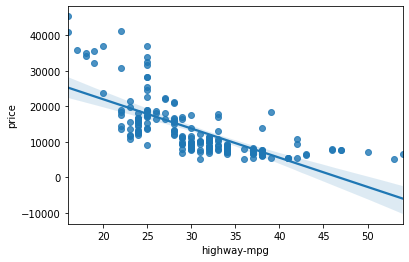

In [27]:
sns.regplot(x="highway-mpg", y="price", data=data)


<AxesSubplot:xlabel='horsepower', ylabel='price'>

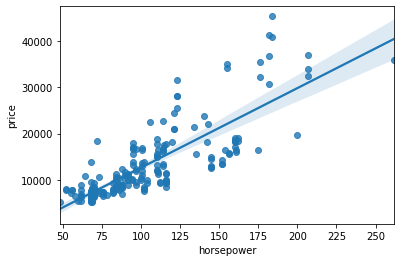

In [28]:
sns.regplot(x="horsepower", y="price", data=data)


<AxesSubplot:xlabel='engine-size', ylabel='price'>

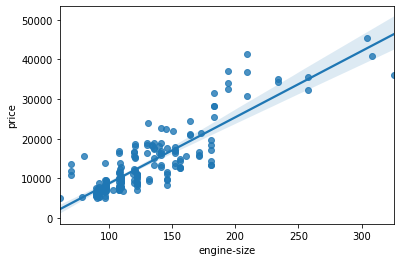

In [29]:
sns.regplot(x="engine-size", y="price", data=data)


<AxesSubplot:xlabel='curb-weight', ylabel='price'>

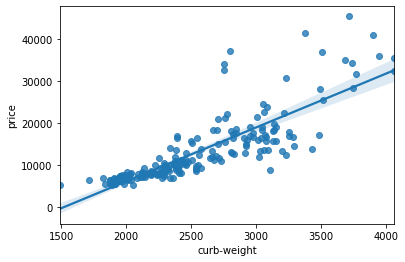

In [30]:
sns.regplot(x="curb-weight", y="price", data=data)


<AxesSubplot:xlabel='normalized-losses', ylabel='price'>

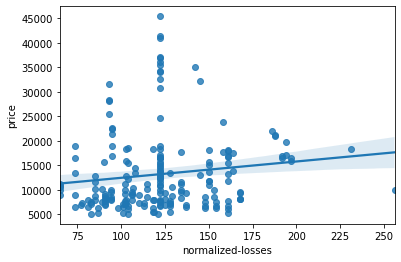

In [31]:
sns.regplot(x="normalized-losses", y="price", data=data)


In [32]:
data[["highway-mpg","horsepower","engine-size","curb-weight"]].head()

highway-mpg  horsepower  engine-size  curb-weight
0           27         111          130         2548
1           26         154          152         2823
2           30         102          109         2337
3           22         115          136         2824
4           25         110          136         2507

In [33]:

y_data = data['price']
x_data=data.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
prediction_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
prediction_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])




0.8062389587667242


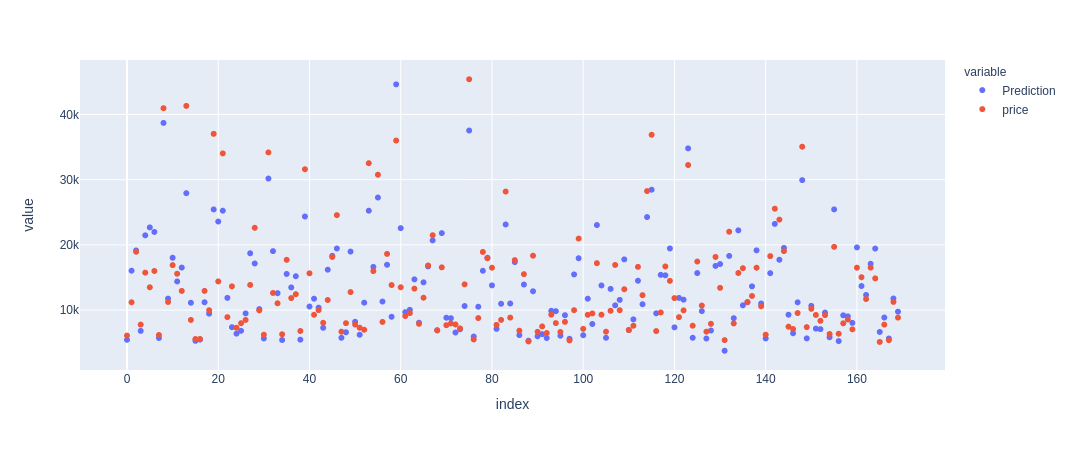

In [34]:
print(metrics.r2_score(y_train,prediction_train))
pt=pd.DataFrame(prediction_train, columns=["Prediction"])
y_train.reset_index(drop=True,inplace=True)
df=pd.concat([pt,y_train], axis=1)
fig=px.scatter(df)
fig.show()

0.820216009478356


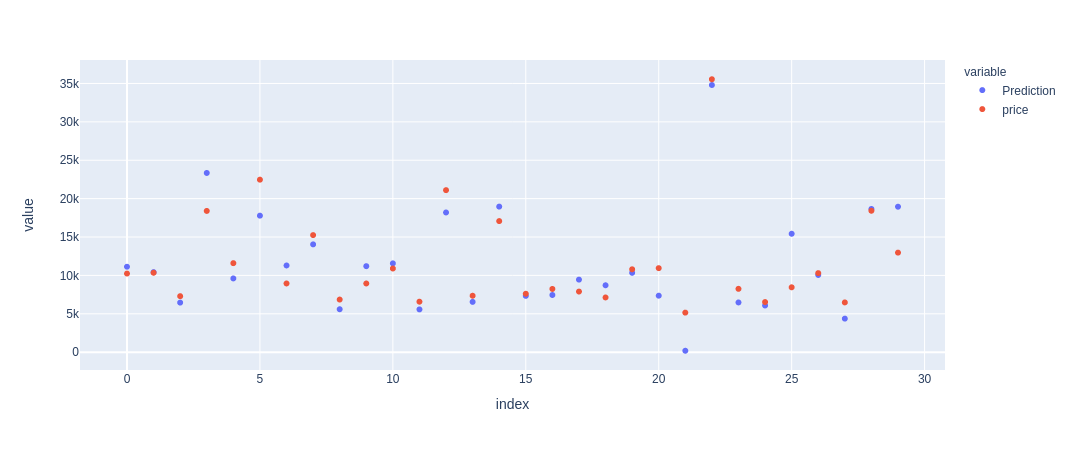

In [35]:
print(metrics.r2_score(y_test,prediction_test))
pt=pd.DataFrame(prediction_test, columns=["Prediction"])
y_test.reset_index(drop=True,inplace=True)
df=pd.concat([pt,y_test], axis=1)
fig=px.scatter(df)
fig.show()